### Test notebook for F1 Tenth 

Initializations 

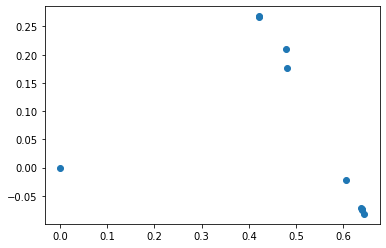

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
a = [7.4946694569932e-16,0.42204416467730427,0.42238693607058175,0.4800066242718265,0.6445968123717759,0.6379365313148346,0.6395776254775869,0.6405750846400665,0.606705294106074,0.47967415803380287]
b = [9.149095922526122e-16,0.2681020758606807,0.26756248505571933,0.17685869156955222,-0.08223324666764165,-0.07174540887756016,-0.07432910086437189,-0.0758981662897909,-0.022581761899417616,0.209483960658]
plt.plot(a,b,'o')


In [7]:
import os
import gym
import time
import numpy as np
import concurrent.futures

from pkg.src.pkg.drivers import GapFollower

drivers = [GapFollower(scan_lap=False)]

RACETRACK = 'SOCHI'

current_dir = os.curdir
env = gym.make('f110_gym:f110-v0',
                       map="{}/pkg/src/pkg/maps/{}".format(current_dir, RACETRACK),
                       map_ext=".png", num_agents=len(drivers))

       
# Sochi
if len(drivers) > 2:
    raise NotImplementedError('Waa no more than two drivers here in Sochi')
elif len(drivers) == 2:
    poses = np.array([[0.8007017, -0.2753365, 4.1421595], [0.8162458, 1.1614572, 4.1446321]])
else:
    poses = np.array([[0.8007017, -0.2753365, 4.1421595]])


In [31]:
obs, step_reward, done, info = env.reset(poses=poses)
env.render()

laptime = 0.0
start = time.time()

while not done:
    actions = []
    futures = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        for i, driver in enumerate(drivers):
            futures.append(executor.submit(driver.process_lidar, obs['scans'][i]))
    for future in futures:
        speed, steer = future.result()
        actions.append([steer, speed])
    actions = np.array(actions)
    obs, step_reward, done, info = env.step(actions)
    laptime += step_reward
    env.render(mode='human')

print('Sim elapsed time:', laptime, 'Real elapsed time:', time.time() - start)

Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 8
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Speed: 11.0
Spee

In [35]:
obs, step_reward, done, info = env.reset(poses=poses)
env.render()

driver = GapFollower(scan_lap=True)


In [36]:
speed_hist = []

for _ in range(2000):
    speed, steer = driver.process_lidar(obs['scans'][0])
    actions = []
    actions.append([steer, speed])
    actions = np.array(actions)
    obs, step_reward, done, info = env.step(actions)
    env.render(mode='human')
    speed_hist.append(obs['linear_vels_x'])
print(obs)

Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0
Speed: 6.0

In [37]:
speed_hist

[[0.05706],
 [0.1135773594],
 [0.16955723871210598],
 [0.22500474937195386],
 [0.27992495420542657],
 [0.33432286789093296],
 [0.3882034574172902],
 [0.44157164253725173],
 [0.49443229621672247],
 [0.5467902450797014],
 [0.5986502698489935],
 [0.6500171057827295],
 [0.7008954431067358],
 [0.7512899274427908],
 [0.8012051602328099],
 [0.8506456991589958],
 [0.8996160585599937],
 [0.9481207098430882],
 [0.9961640818924804],
 [1.0437505614736828],
 [1.090884493634068],
 [1.137570182099608],
 [1.1838118896678407],
 [1.2296138385970996],
 [1.2749802109920412],
 [1.3199151491855068],
 [1.3644227561167526],
 [1.4085070957060823],
 [1.4521721932259175],
 [1.495422035668339],
 [1.5382605721091331],
 [1.5806917140683754],
 [1.622719335867585],
 [1.6643472749834844],
 [1.7055793323983914],
 [1.7464192729472827],
 [1.786870825661554],
 [1.8269376841095126],
 [1.8666235067336312],
 [1.9059319171845943],
 [1.944866504652169],
 [1.9834308241929268],
 [2.021628397054852],
 [2.05946271099886],
 [2.0969